In [14]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import pandas as pd
from tqdm import tqdm
import os
import os
from sklearn.metrics import confusion_matrix

In [15]:
# path = '../DyAD/dyad_vae_save'
# path_list = os.listdir('../DyAD/dyad_vae_save')
# data = '2022-02-23-22-43-46_fold1'
# test_res_csv_fold0_path = os.path.join(os.path.join(path,data),'result/test_segment_scores.csv')
# train_res_csv_fold0_path = os.path.join(os.path.join(path,data),'result/train_segment_scores.csv')

# You should change the following path.

In [18]:
test_res_csv_fold0 = pd.read_csv('../DyAD/dyad_vae_save/2022-09-08-10-56-31_fold0/result/test_segment_scores.csv')
test_res_csv_fold1 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-46_fold1/result/test_segment_scores.csv')
test_res_csv_fold2 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-51_fold2/result/test_segment_scores.csv')
test_res_csv_fold3 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-41-48_fold3/result/test_segment_scores.csv')
test_res_csv_fold4 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-48_fold4/result/test_segment_scores.csv')
train_res_csv_fold0 = pd.read_csv('../DyAD/dyad_vae_save/2022-09-08-10-56-31_fold0/result/train_segment_scores.csv')
train_res_csv_fold1 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-46_fold1/result/train_segment_scores.csv')
train_res_csv_fold2 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-51_fold2/result/train_segment_scores.csv')
train_res_csv_fold3 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-41-48_fold3/result/train_segment_scores.csv')
train_res_csv_fold4 = pd.read_csv('../DyAD/dyad_vae_save/2022-02-23-22-43-48_fold4/result/train_segment_scores.csv')

In [19]:
# replace the following two car number lists
ind_ood_car_dict = np.load('../five_fold_utils/ind_odd_dict1.npz.npy', allow_pickle=True).item()
ind_car_num_list = ind_ood_car_dict['ind_sorted']
ood_car_num_list = ind_ood_car_dict['ood_sorted'] 
all_car_num_list = set(ind_car_num_list + ood_car_num_list)

print(len(ind_car_num_list))
print(len(ood_car_num_list))

168
30


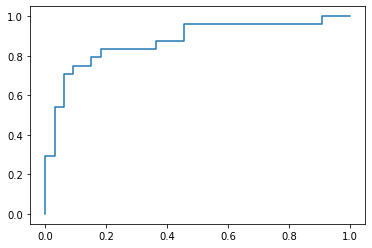

0.8737373737373738
AUC mean  0.8737373737373738


In [22]:
AUC_fivefold_list = []
# for i in range(5):
for i in range(1):
    fold_num = i
    
    validation_car_number = ind_car_num_list[:int(fold_num * len(ind_car_num_list) / 5)] + ind_car_num_list[int((fold_num + 1) * len(ind_car_num_list) / 5):] + ood_car_num_list[int(fold_num * len(ood_car_num_list) / 5):int((fold_num + 1) * len(ood_car_num_list) / 5)]
    # test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
    test_car_number = ind_car_num_list[int(fold_num * len(ind_car_num_list) / 5):int((fold_num + 1) * len(ind_car_num_list) / 5)] + ood_car_num_list[:int(fold_num * len(ood_car_num_list) / 5)] + ood_car_num_list[int((fold_num + 1) * len(ood_car_num_list) / 5):]
    
    data = np.vstack((np.array(eval('train_res_csv_fold%d' % i)), np.array(eval('test_res_csv_fold%d' % i))))[:, 1:]
#     print(data[0:5])
    
    ind_car_score = []
    ood_car_score = []

    for each_car_num in test_car_number:
        this_car_score = np.mean(data[np.where(data[:, 0]==each_car_num)][:, 2])
        if each_car_num in ind_car_num_list:
            ind_car_score.append(this_car_score)
        else:
            ood_car_score.append(this_car_score)
    #     print(each_car_num, len(this_car_score))
    
    label = [1] * len(ood_car_score) + [0] * len(ind_car_score)
    score = np.hstack((ood_car_score, ind_car_score))

    fpr, tpr, thresholds = metrics.roc_curve(label, score, pos_label=1)
    plt.plot(fpr, tpr)
    plt.show()
    AUC = auc(fpr, tpr)
    print(AUC)
    os.makedirs('../DyAD/auc', exist_ok=True)
    np.save('../DyAD/auc/average_all_score_fold%d.npy' % fold_num, score)
    np.save('../DyAD/auc/average_labels_fold%d.npy' % fold_num, label)
    
    AUC_fivefold_list.append(AUC)
    
print('AUC mean ', np.mean(AUC_fivefold_list))


In [13]:
plt.show()